# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from feature_engine.outliers import Winsorizer
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from wordcloud import WordCloud
from wordcloud import STOPWORDS


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Customer_Segmentation.csv')
%store df
df

Stored 'df' (DataFrame)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [3]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
df.dropna(axis = 0,inplace = True)
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [7]:
#Cancelled orders are set aside for further exploration
#Negative unit prices express unpaid fee, we want to remove them
#In the main datafarme we only left positives for both
df_cancel = df[df.Quantity <  0]
df = df[(df.Quantity >  0) & (df.UnitPrice >  0)]

In [8]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df['InvoiceYear'] = df['InvoiceDate'].dt.year
df['InvoiceHour'] = df['InvoiceDate'].dt.hour

#Time Range
print(df["InvoiceDate"].min())
print(df["InvoiceDate"].max())

2010-12-01 08:26:00
2011-12-09 12:50:00


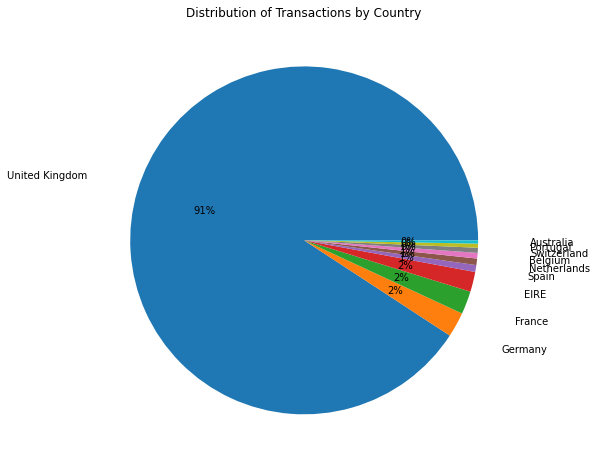

In [9]:
top10 = df["Country"].value_counts().head(10)
plt.figure(figsize=[8,8])
plt.pie(top10,labels=top10.index, autopct = '%0.0f%%',labeldistance=1.3)
plt.title("Distribution of Transactions by Country")
plt.show()

In [10]:
#Number of orders 
df_quant_m = df.groupby("InvoiceMonth").Quantity.sum()
df_quant_h = df.groupby("InvoiceHour").Quantity.sum()

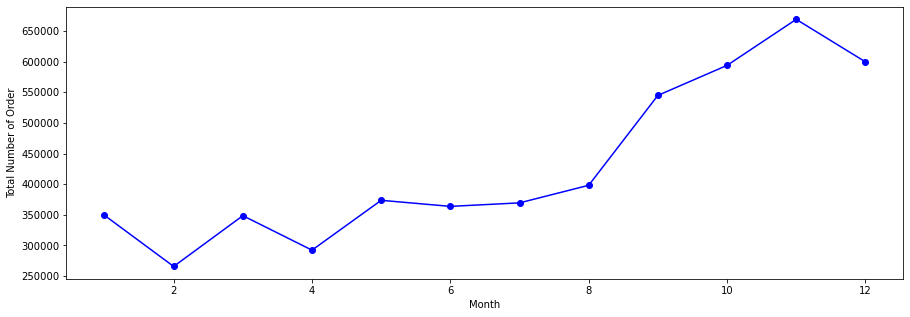

In [11]:
plt.figure(figsize = (15,5))
plt.plot(df_quant_m, color = "blue", marker = 'o')
plt.gca().set(xlabel='Month', ylabel='Total Number of Order')
plt.show()

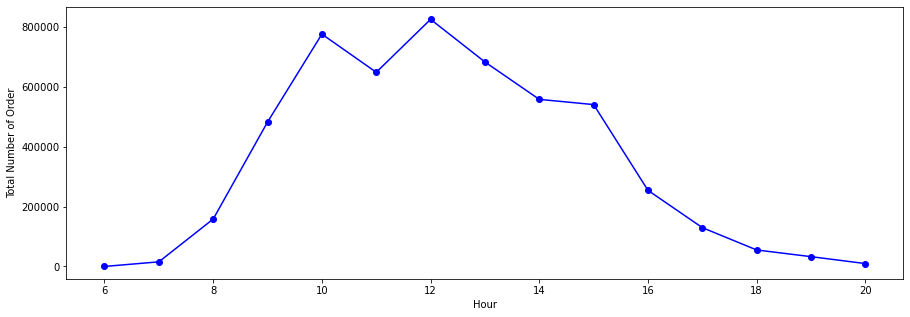

In [12]:
plt.figure(figsize = (15,5))
plt.plot(df_quant_h, color = "blue", marker = 'o')
plt.gca().set(xlabel='Hour', ylabel='Total Number of Order')
plt.show()

In [13]:
#Number of income
df['Revenue'] = df['Quantity']*df['UnitPrice']
df_reven_m = df.groupby("InvoiceMonth").Revenue.sum()
df_reven_h = df.groupby("InvoiceHour").Revenue.sum()
df_reven_m

InvoiceMonth
1      569445.040
2      447137.350
3      595500.760
4      469200.361
5      678594.560
6      661213.690
7      600091.011
8      645343.900
9      952838.382
10    1039318.790
11    1161817.380
12    1090906.680
Name: Revenue, dtype: float64

In [14]:
%store df
df.head()

Stored 'df' (DataFrame)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,InvoiceYear,InvoiceHour,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,8,20.34


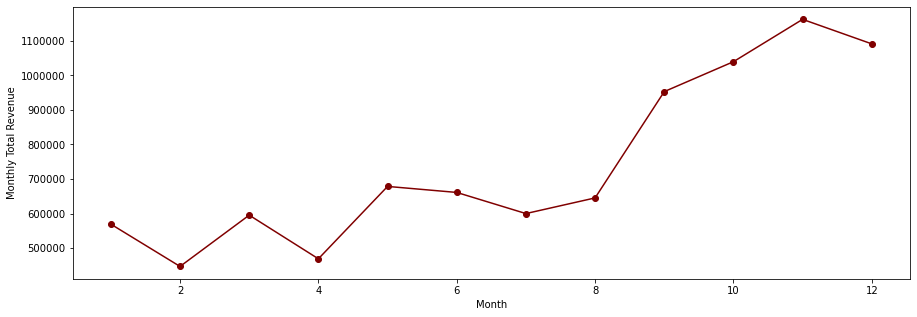

In [15]:
plt.figure(figsize = (15,5))
plt.ticklabel_format(style='plain')
plt.plot(df_reven_m, color = "maroon", marker = 'o')
plt.gca().set(xlabel='Month', ylabel='Monthly Total Revenue')
plt.show()

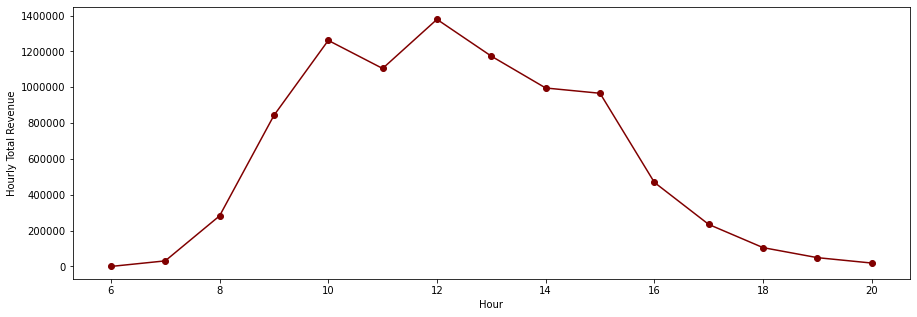

In [16]:
plt.figure(figsize = (15,5))
plt.ticklabel_format(style='plain')
plt.plot(df_reven_h, color = "maroon", marker = 'o')
plt.gca().set(xlabel='Hour', ylabel='Hourly Total Revenue')
plt.show()

In [17]:
df_product = df.groupby("StockCode").Quantity.sum()
df_product

StockCode
10002      823
10080      291
10120      193
10123C       5
10124A      16
          ... 
C2         134
DOT         16
M         7173
PADS         3
POST      3120
Name: Quantity, Length: 3665, dtype: int64

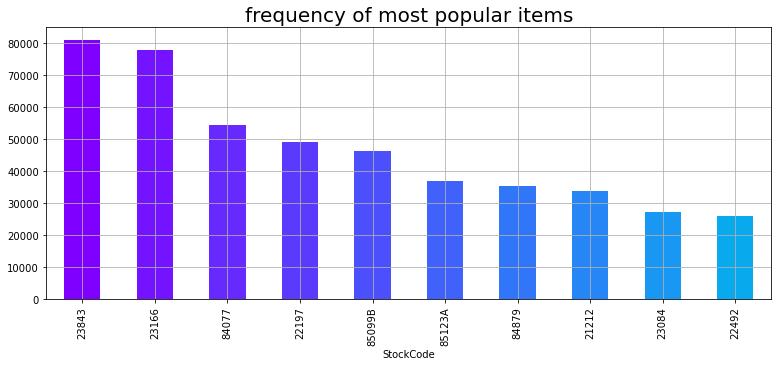

In [18]:
color = plt.cm.rainbow(np.linspace(0, 1, 40))
df_product.nlargest(10).plot.bar(color = color, figsize=(13,5))
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

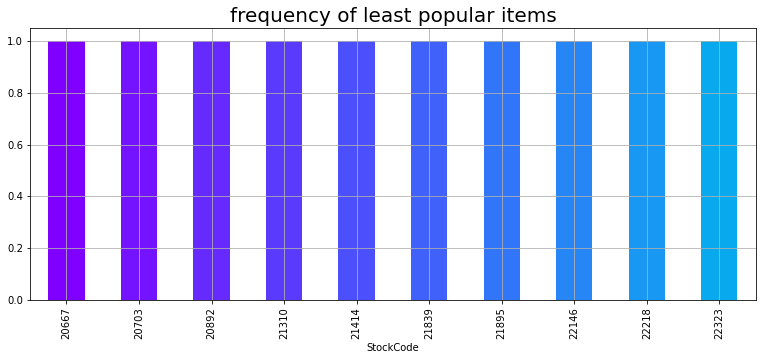

In [19]:
color = plt.cm.rainbow(np.linspace(0, 1, 40))
df_product.nsmallest(10).plot.bar(color = color, figsize=(13,5))
plt.title('frequency of least popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

# .......................................................................................................................

## RFM ANALYSIS
### Recency

In [20]:
max_date = df['InvoiceDate'].max() + datetime.timedelta(days = 1)
last_transact = df.groupby("CustomerID").InvoiceDate.max()
max_date,last_transact

(Timestamp('2011-12-10 12:50:00'),
 CustomerID
 12346.0   2011-01-18 10:01:00
 12347.0   2011-12-07 15:52:00
 12348.0   2011-09-25 13:13:00
 12349.0   2011-11-21 09:51:00
 12350.0   2011-02-02 16:01:00
                   ...        
 18280.0   2011-03-07 09:52:00
 18281.0   2011-06-12 10:53:00
 18282.0   2011-12-02 11:43:00
 18283.0   2011-12-06 12:02:00
 18287.0   2011-10-28 09:29:00
 Name: InvoiceDate, Length: 4338, dtype: datetime64[ns])

In [21]:
difference = max_date - last_transact
difference = difference.reset_index()
difference.columns  = ['CustomerID','Diff']
difference

,CustomerID,Diff
0,12346.0,326 days 02:49:00
1,12347.0,2 days 20:58:00
2,12348.0,75 days 23:37:00
3,12349.0,19 days 02:59:00
4,12350.0,310 days 20:49:00
...,...,...
4333,18280.0,278 days 02:58:00
4334,18281.0,181 days 01:57:00
4335,18282.0,8 days 01:07:00
4336,18283.0,4 days 00:48:00


In [22]:
difference['Diff'] = difference['Diff'].dt.days
difference

,CustomerID,Diff
0,12346.0,326
1,12347.0,2
2,12348.0,75
3,12349.0,19
4,12350.0,310
...,...,...
4333,18280.0,278
4334,18281.0,181
4335,18282.0,8
4336,18283.0,4


### Frequency

In [23]:
frequency = df.groupby('CustomerID')['InvoiceNo'].count()
frequency

CustomerID
12346.0      1
12347.0    182
12348.0     31
12349.0     73
12350.0     17
          ... 
18280.0     10
18281.0      7
18282.0     12
18283.0    756
18287.0     70
Name: InvoiceNo, Length: 4338, dtype: int64

### Monetary

In [24]:
df['Amount'] = df['Quantity']*df['UnitPrice']
monetary = df.groupby('CustomerID')['Amount'].sum()
monetary

CustomerID
12346.0    77183.60
12347.0     4310.00
12348.0     1797.24
12349.0     1757.55
12350.0      334.40
             ...   
18280.0      180.60
18281.0       80.82
18282.0      178.05
18283.0     2094.88
18287.0     1837.28
Name: Amount, Length: 4338, dtype: float64

In [25]:
rfm = pd.merge(difference, frequency, on='CustomerID', how='inner')
rfm = pd.merge(rfm, monetary, on='CustomerID', how='inner')
rfm.columns = ['CustomerID','Recency','Frequency','Monetary']
rfm

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,19,73,1757.55
4,12350.0,310,17,334.40
...,...,...,...,...
4333,18280.0,278,10,180.60
4334,18281.0,181,7,80.82
4335,18282.0,8,12,178.05
4336,18283.0,4,756,2094.88


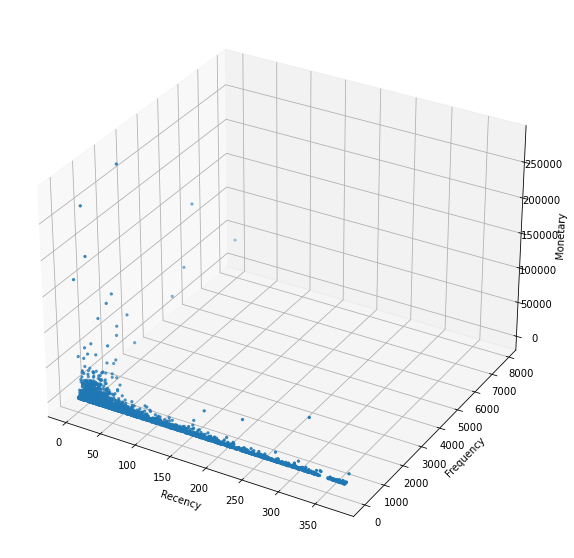

In [26]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

xs = rfm.Recency
ys = rfm.Frequency
zs = rfm.Monetary
ax.scatter(xs, ys, zs, s=5)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.show()

In [27]:
rfm["R"] = pd.qcut(rfm["Recency"],5,labels=[5,4,3,2,1])
rfm["F"] = pd.qcut(rfm["Frequency"],5,labels=[1,2,3,4,5])
rfm["M"] = pd.qcut(rfm["Monetary"],5,labels=[1,2,3,4,5])

rfm["RFM_Score"] = rfm["R"].astype(str) +rfm["F"].astype(str) + rfm["M"].astype(str)
rfm

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Score
0,12346.0,326,1,77183.60,1,1,5,115
1,12347.0,2,182,4310.00,5,5,5,555
2,12348.0,75,31,1797.24,2,3,4,234
3,12349.0,19,73,1757.55,4,4,4,444
4,12350.0,310,17,334.40,1,2,2,122
...,...,...,...,...,...,...,...,...
4333,18280.0,278,10,180.60,1,1,1,111
4334,18281.0,181,7,80.82,1,1,1,111
4335,18282.0,8,12,178.05,5,1,1,511
4336,18283.0,4,756,2094.88,5,5,5,555


In [28]:
seg_map = {
    r'555': 'Champions',
    r'[3-5][3-5][3-5]': 'Loyal Customers',
    r'[3-5][2-5][1-3]': 'Potential Loyal Customers',
    r'[3-5][1-2][1-2]': 'New Customers',
    r'[3-5][1-2][1-5]': 'Promising',
    r'[3-5][2-4][3-5]': 'Need Attention',
    r'[2-3][1-5][1-3]': 'About to Sleep',
    r'[1-2][2-5][2-5]': 'At Risk',
    r'[1-2]1[3-5]': 'Cannot Lose Them',
    r'[1-2][4-5][3-5]': 'Cannot Lose Them',
    r'[1-3][1-3][1-3]': 'Hibernating',
    r'1[1-5][1-2]': 'Lost Customers',
}

In [29]:
rfm[((rfm.R).astype(int) & (rfm.F).astype(int) & (rfm.M).astype(int)) > 2]

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Score
1,12347.0,2,182,4310.00,5,5,5,555
3,12349.0,19,73,1757.55,4,4,4,444
9,12356.0,23,59,2811.43,4,4,5,445
10,12357.0,33,131,6207.67,4,5,5,455
15,12362.0,3,266,5226.23,5,5,5,555
...,...,...,...,...,...,...,...,...
4309,18245.0,7,175,2567.06,5,5,5,555
4322,18263.0,26,61,1213.16,4,4,4,444
4323,18265.0,72,46,801.51,3,3,3,333
4327,18272.0,3,166,3078.58,5,5,5,555


In [30]:
rfm['Segment'] = rfm['RFM_Score']
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)
rfm

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment
0,12346.0,326,1,77183.60,1,1,5,115,Cannot Lose Them
1,12347.0,2,182,4310.00,5,5,5,555,Champions
2,12348.0,75,31,1797.24,2,3,4,234,At Risk
3,12349.0,19,73,1757.55,4,4,4,444,Loyal Customers
4,12350.0,310,17,334.40,1,2,2,122,At Risk
...,...,...,...,...,...,...,...,...,...
4333,18280.0,278,10,180.60,1,1,1,111,Hibernating
4334,18281.0,181,7,80.82,1,1,1,111,Hibernating
4335,18282.0,8,12,178.05,5,1,1,511,New Customers
4336,18283.0,4,756,2094.88,5,5,5,555,Champions


In [31]:
labels = rfm.groupby(['Segment'])['CustomerID'].count().sort_values(ascending=False).reset_index()
labels

,Segment,CustomerID
0,Loyal Customers,1421
1,At Risk,625
2,About to Sleep,595
3,Potential Loyal Customers,534
4,Hibernating,431
5,Champions,306
6,New Customers,269
7,Promising,100
8,Cannot Lose Them,54
9,Lost Customers,3


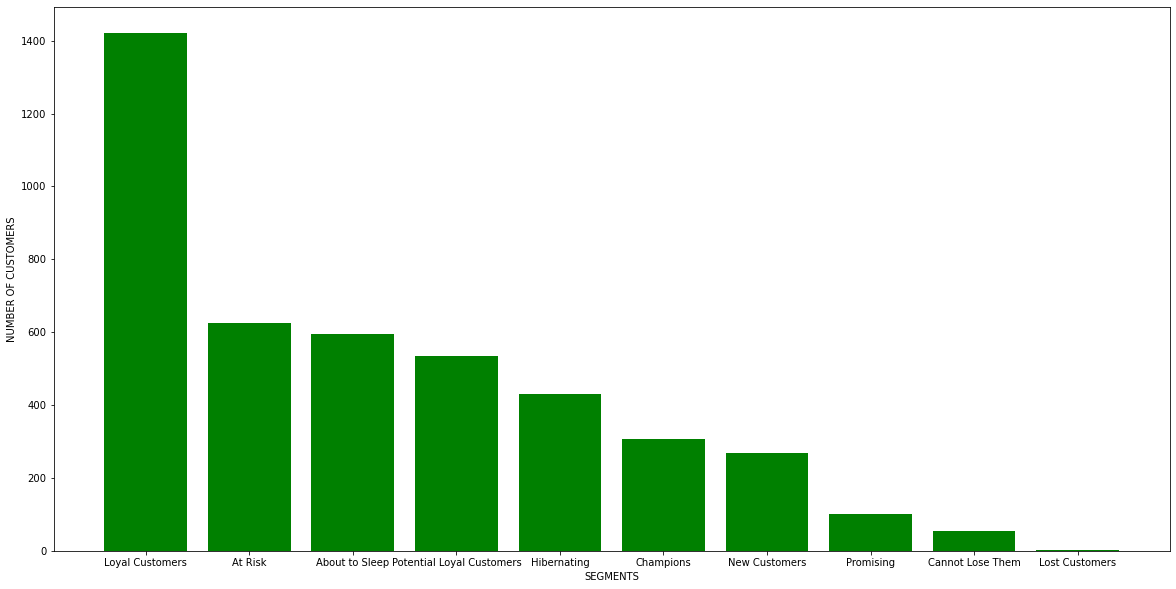

In [32]:
fig, ax = plt.subplots(figsize=(20,10))
plt.bar(labels['Segment'],labels['CustomerID'],color = 'g')
plt.gca().set(xlabel='SEGMENTS', ylabel='NUMBER OF CUSTOMERS')
plt.show()

# ..................................................................................................

In [33]:
rfm_new = rfm.drop(['R','F','M','RFM_Score','Segment'], axis=1)
rfm_new.set_index("CustomerID",inplace = True)
rfm_new

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05


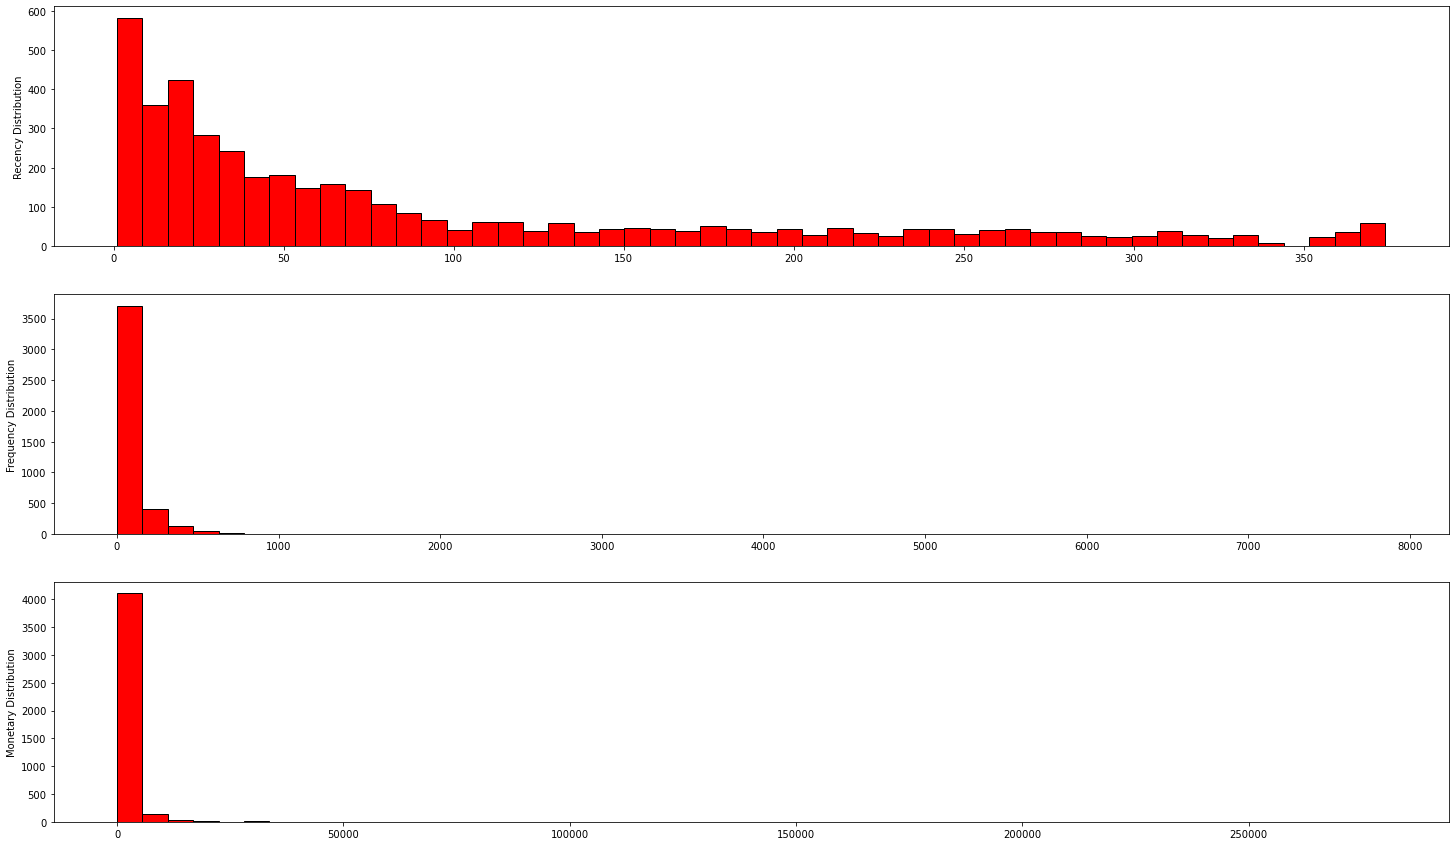

In [34]:
fig, axes= plt.subplots(3,figsize = (25,15));

axes[0].hist(rfm_new.Recency,color = 'red',edgecolor = 'black',bins = 50)
axes[0].set_ylabel('Recency Distribution');

axes[1].hist(rfm_new.Frequency,color = 'red',edgecolor = 'black',bins = 50)
axes[1].set_ylabel('Frequency Distribution');

axes[2].hist(rfm_new.Monetary,color = 'red',edgecolor = 'black',bins = 50)
axes[2].set_ylabel('Monetary Distribution');
plt.show()
#clustering algorithms work best when data is not skewed but standardized.
#Since our data is highly right skewed,square root and cube root will perform weakly.
#We must use log transform.

In [35]:
rfm_new.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Recency,1.246048,0.430576
Frequency,18.106165,483.431675
Monetary,19.324953,478.048121


In [36]:
rfm_log = np.log(rfm_new)

rfm_log.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Recency,-0.554566,-0.271990
Frequency,-0.218240,0.212606
Monetary,0.380936,0.738802


In [37]:
#Capping outlier data.
#The default is Gaussian with 3 fold which means mean+/-3 std.
#I lowered fold parameter in order not to over-cap some needed customer segments.i.e. Champions,Lost Customers.

winsorizer = Winsorizer(tail = 'both', fold = 4, variables = ['Recency','Frequency','Monetary'])
rfm_log = winsorizer.fit_transform(rfm_log)

In [38]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)
rfm_scaled = pd.DataFrame(rfm_scaled, columns = rfm_new.columns,index = rfm_new.index)
%store rfm_scaled

rfm_scaled

Stored 'rfm_scaled' (DataFrame)


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,1.409894,-2.775160,3.708749
12347.0,-2.146498,1.149549,1.414348
12348.0,0.383971,-0.185347,0.718782
12349.0,-0.574674,0.460579,0.701023
12350.0,1.374758,-0.638433,-0.618512
...,...,...,...
18280.0,1.298690,-1.038617,-1.108409
18281.0,0.999081,-1.307611,-1.747812
18282.0,-1.178605,-0.901116,-1.119717
